## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0 )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

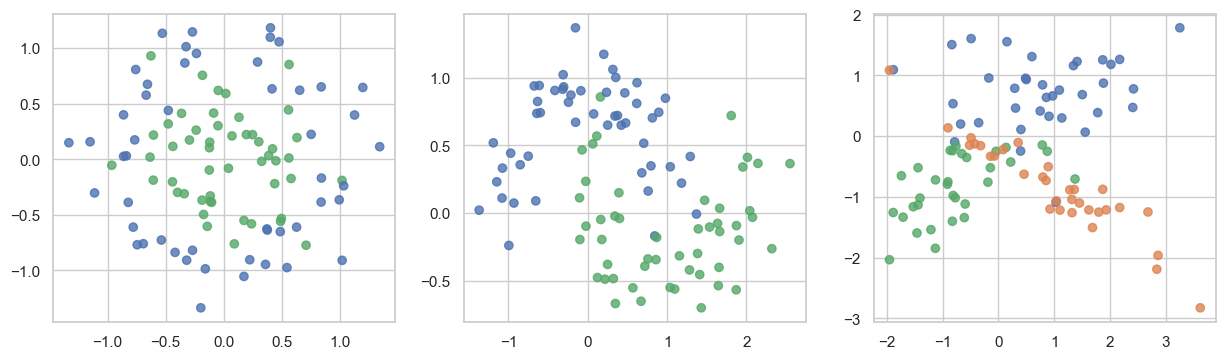

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [8]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

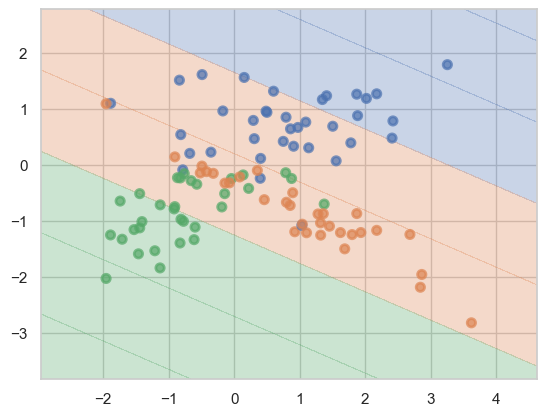

In [9]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

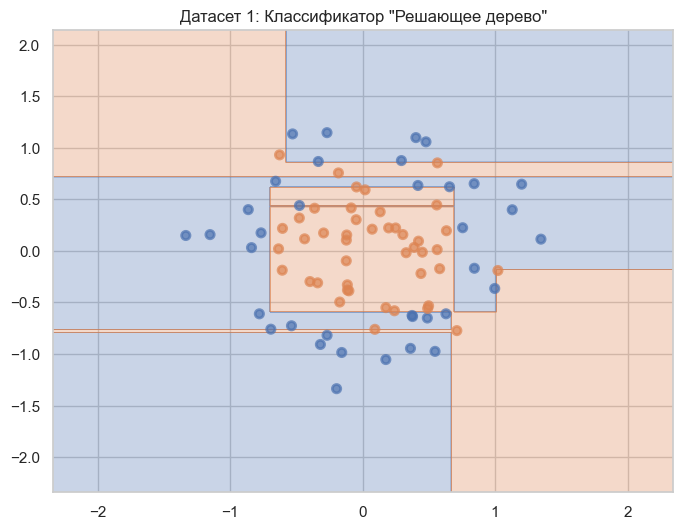

Датасет 1:
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.65


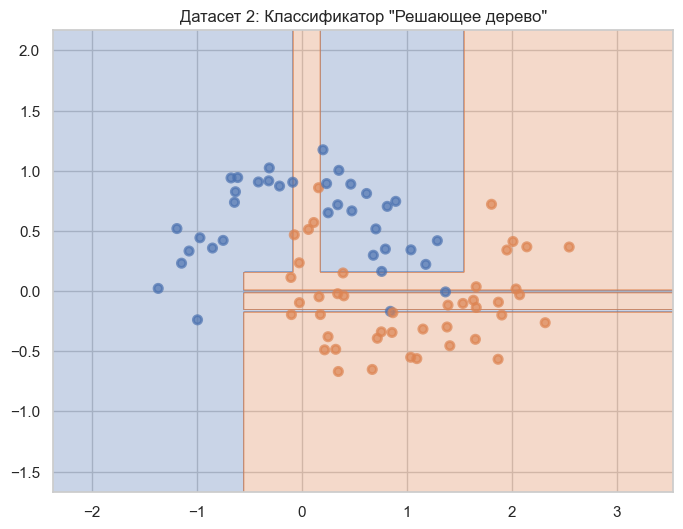

Датасет 2:
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.95


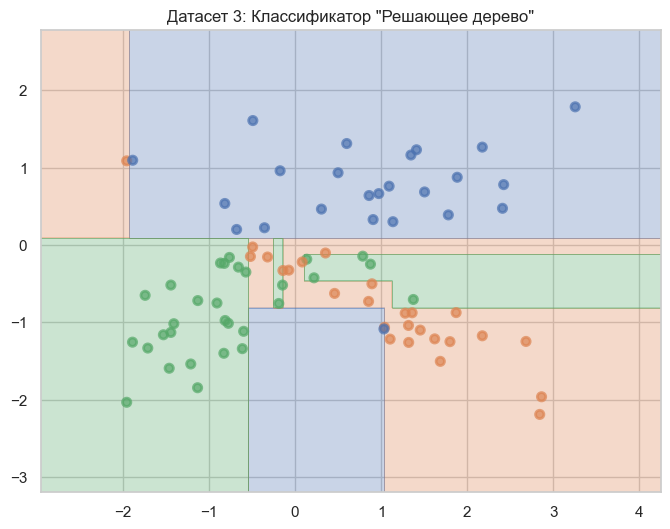

Датасет 3:
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.70


In [10]:
# Цикл по датасетам
for i, (X, y) in enumerate(datasets):
    # Шаг 1: Разбиваем данные на обучающую и тестовую выборки (80% обучающих данных, 20% тестовых данных)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Шаг 2: Обучаем решающее дерево с параметрами по умолчанию
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Шаг 3: Визуализируем разделяющие поверхности
    plt.figure(figsize=(8, 6))
    plot_surface(clf, X_train, y_train)  # Разделяющая поверхность для обучающей выборки
    plt.title(f'Датасет {i+1}: Классификатор "Решающее дерево"')
    plt.show()
    
    # Шаг 4: Оцениваем точность на обучающей и тестовой выборках
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    print(f'Датасет {i+1}:')
    print(f'Точность на обучающей выборке: {train_accuracy:.2f}')
    print(f'Точность на тестовой выборке: {test_accuracy:.2f}')



__Ответ:__
Переобучение происходит, когда модель слишком хорошо "запоминает" обучающие данные и не может обобщать свои знания на новые, ранее не виденные данные. Признаки переобучения включают в себя высокую точность на обучающей выборке и низкую точность на тестовой выборке.

Исходя из ваших выводов точности для каждого датасета (обучающая и тестовая точность), вы можете сделать следующие выводы:

- Если точность на обучающей выборке высока, а на тестовой низка, это может указывать на переобучение. Если разница между обучающей и тестовой точностью значительна, это является сигналом о переобучении.

- Если точность на обучающей и тестовой выборках схожа и достаточно высока, это может указывать на то, что модель хорошо обобщает данные и не переобучена.

Таким образом, для судейства о том, насколько сильно деревья переобучились, вам нужно сравнить точность на обучающей и тестовой выборках. Если разница в точности между обучающей и тестовой выборками незначительна, можно сказать, что переобучения нет или оно слабо выражено. Если разница большая, это может свидетельствовать о переобучении.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Датасет 1:
Наилучшие параметры:  {'max_depth': None, 'min_samples_leaf': 4}


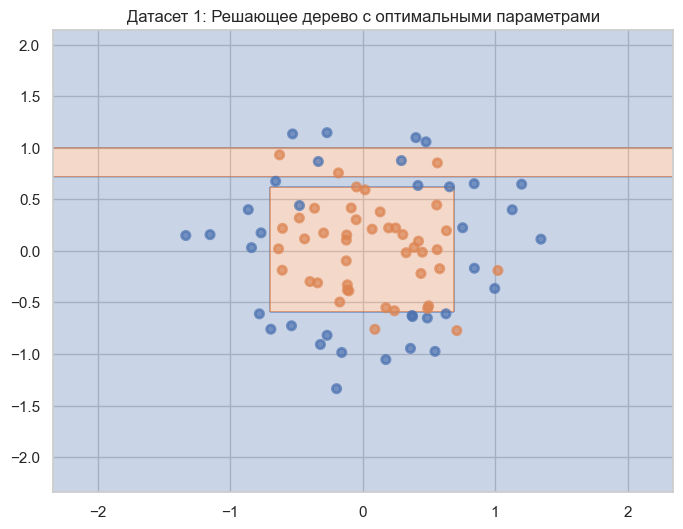

Точность на обучающей выборке: 0.93
Точность на тестовой выборке: 0.75
Датасет 2:
Наилучшие параметры:  {'max_depth': None, 'min_samples_leaf': 1}


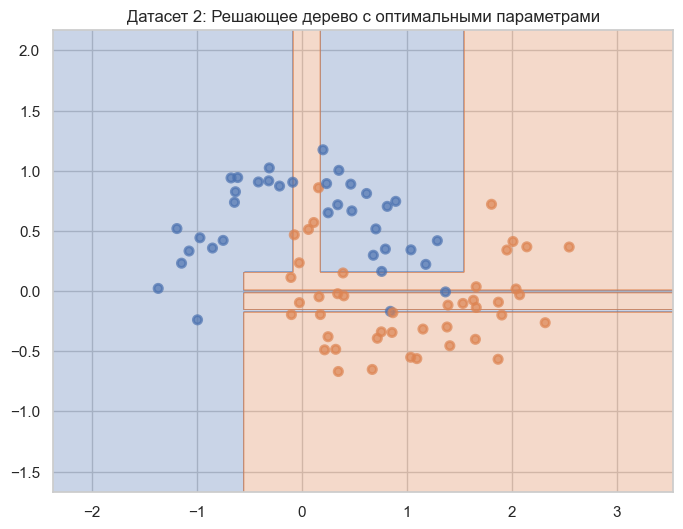

Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.95
Датасет 3:
Наилучшие параметры:  {'max_depth': 3, 'min_samples_leaf': 2}


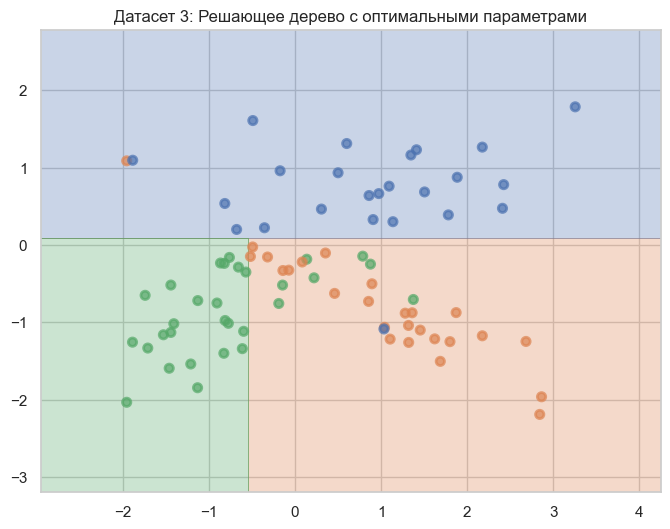

Точность на обучающей выборке: 0.89
Точность на тестовой выборке: 0.75


In [14]:
from sklearn.model_selection import GridSearchCV

# Параметры для перебора
param_grid = {
    'max_depth': [None, 3, 5, 7],  # Максимальная глубина дерева (None означает, что узлы будут расширяться до тех пор, пока каждый лист не будет содержать min_samples_split примеров)
    'min_samples_leaf': [1, 2, 4]  # Минимальное количество примеров в листе дерева
}

# Цикл по датасетам
for i, (X, y) in enumerate(datasets):
    # Шаг 1: Разбиваем данные на обучающую и тестовую выборки (80% обучающих данных, 20% тестовых данных)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Шаг 2: Используем GridSearchCV для перебора гиперпараметров
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Шаг 3: Выводим наилучшие параметры
    print(f'Датасет {i+1}:')
    print("Наилучшие параметры: ", grid_search.best_params_)
    
    # Шаг 4: Визуализируем разделяющие поверхности для наилучшей модели
    plt.figure(figsize=(8, 6))
    plot_surface(grid_search.best_estimator_, X_train, y_train)  # Разделяющая поверхность для обучающей выборки
    plt.title(f'Датасет {i+1}: Решающее дерево с оптимальными параметрами')
    plt.show()
    
    # Шаг 5: Оцениваем точность на обучающей и тестовой выборках
    train_accuracy = grid_search.best_estimator_.score(X_train, y_train)
    test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
    
    print(f'Точность на обучающей выборке: {train_accuracy:.2f}')
    print(f'Точность на тестовой выборке: {test_accuracy:.2f}')



__Ответ:__
Когда мы изменяем гиперпараметры модели, такие как `max_depth` и `min_samples_leaf`, это оказывает влияние на разделяющую поверхность и обобщающую способность модели. Вот как обычно меняются разделяющие поверхности и обобщающая способность при изменении этих параметров:

1. **Увеличение `max_depth`**:
   - **Разделяющая поверхность:** При увеличении глубины дерева модель становится более сложной и способной выявлять более сложные закономерности в данных. Разделяющая поверхность становится более сложной и может более точно подстраиваться под данные.
   - **Обобщающая способность:** При слишком большой глубине дерева модель может начать переобучаться на обучающих данных и плохо обобщать на новых данных (тестовых данных). Это может привести к низкой точности на тестовой выборке (переобучение).

2. **Увеличение `min_samples_leaf`**:
   - **Разделяющая поверхность:** Увеличение значения `min_samples_leaf` приводит к более простым разделяющим поверхностям, так как модель создает более обобщенные правила для каждого листа дерева. Это может сгладить разделяющую поверхность и сделать ее менее зашумленной.
   - **Обобщающая способность:** Увеличение `min_samples_leaf` может улучшить обобщающую способность модели, поскольку более крупные листья могут уменьшить переобучение, особенно в случае, когда в данных есть шум или выбросы.

Эти изменения могут варьироваться для разных датасетов из-за их уникальных свойств. Например, в случае сложных или перекрывающихся классов (как в датасете с кругами), увеличение глубины дерева может улучшить разделение классов. Однако в случае более шумных данных (как в датасете с лунами), более простые модели могут быть более способными к обобщению.

Поэтому, когда мы меняем гиперпараметры, мы ищем баланс между точностью на обучающих данных и способностью модели обобщать на новых данных. Подбор оптимальных гиперпараметров является важным этапом в построении модели, и он должен проводиться с учетом конкретных характеристик данных.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

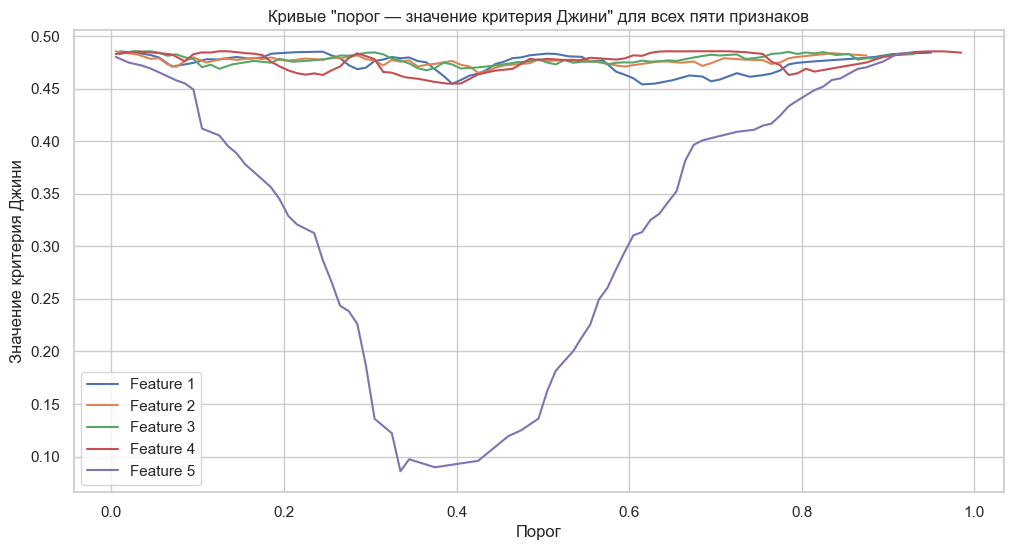

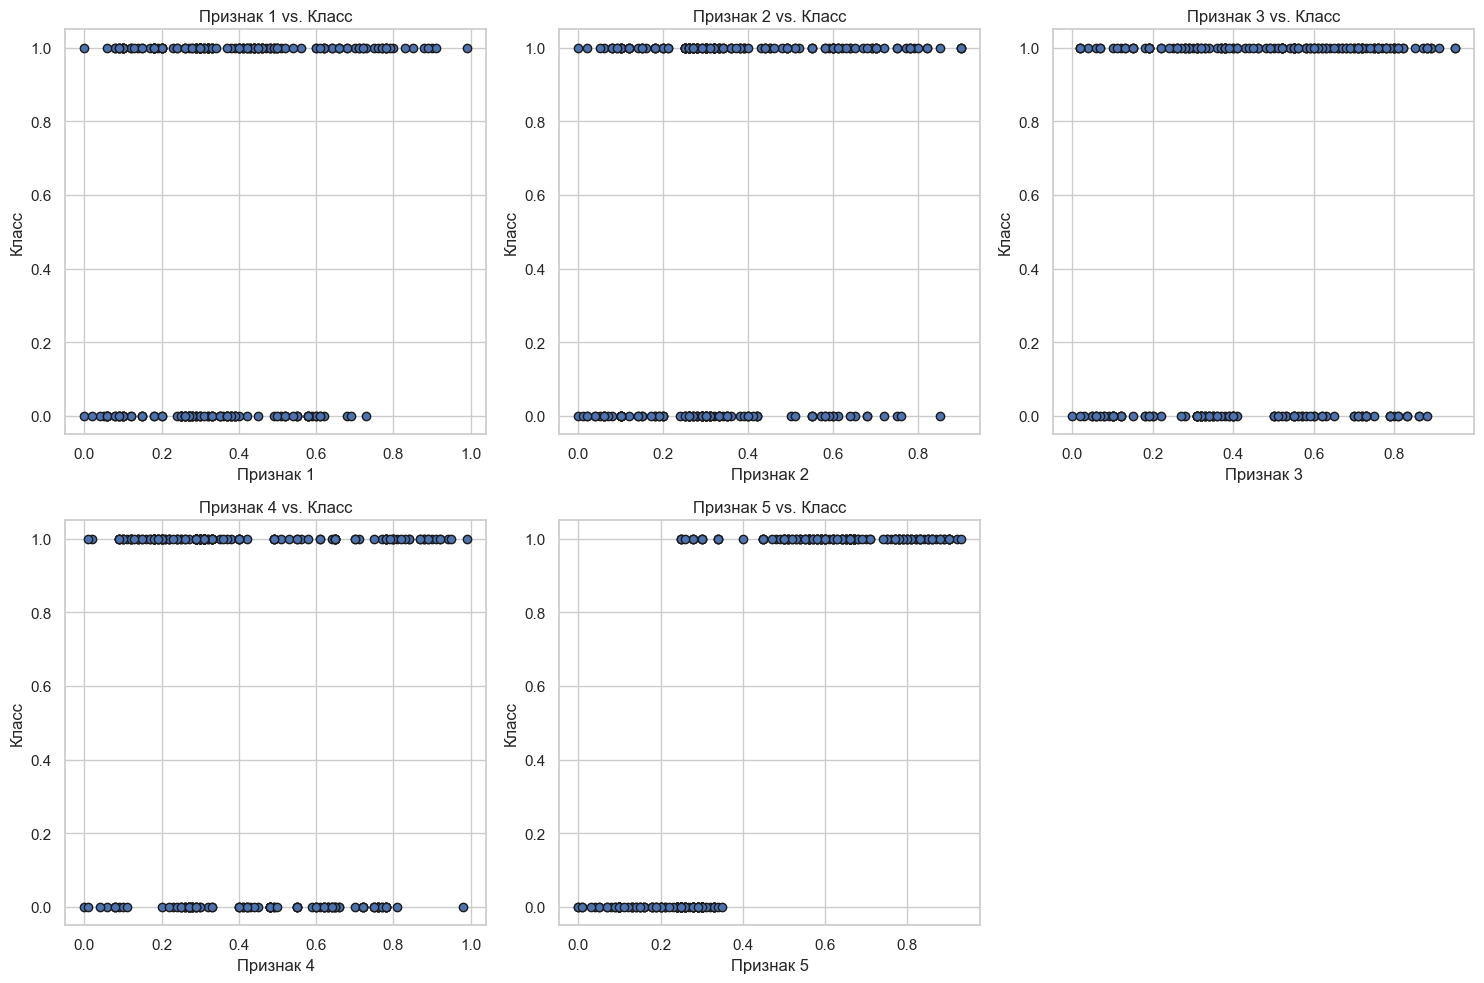

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла students.csv
data = pd.read_csv('students.csv')

# Отделяем признаки от целевой переменной
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

# Функция для вычисления значения критерия Джини
def compute_gini(feature_vector, target_vector):
    unique_values = sorted(set(feature_vector))
    thresholds = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]
    ginis = []
    
    for threshold in thresholds:
        left_mask = feature_vector < threshold
        right_mask = ~left_mask
        
        left_class_0 = (target_vector[left_mask] == 0).sum()
        left_class_1 = (target_vector[left_mask] == 1).sum()
        right_class_0 = (target_vector[right_mask] == 0).sum()
        right_class_1 = (target_vector[right_mask] == 1).sum()
        
        left_size = left_class_0 + left_class_1
        right_size = right_class_0 + right_class_1
        
        gini_left = 1 - (left_class_0 / left_size) ** 2 - (left_class_1 / left_size) ** 2
        gini_right = 1 - (right_class_0 / right_size) ** 2 - (right_class_1 / right_size) ** 2
        
        gini = (left_size / (left_size + right_size)) * gini_left + (right_size / (left_size + right_size)) * gini_right
        ginis.append(gini)
    
    best_gini = min(ginis)
    best_threshold = thresholds[ginis.index(best_gini)]
    
    return thresholds, ginis, best_threshold, best_gini

# Создаем subplot для отображения всех кривых на одном изображении
plt.figure(figsize=(12, 6))

# Перебираем все признаки (первые пять столбцов)
for i in range(features.shape[1]):
    feature_vector = features.iloc[:, i]
    thresholds, ginis, threshold_best, gini_best = compute_gini(feature_vector, target)
    plt.plot(thresholds, ginis, label=f'Feature {i+1}')

# Добавляем легенду и подписи к осям
plt.legend()
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.title('Кривые "порог — значение критерия Джини" для всех пяти признаков')

# Отдельно визуализируем scatter-графики "значение признака — класс" для всех пяти признаков
plt.figure(figsize=(15, 10))
for i in range(features.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(features.iloc[:, i], target, marker='o', edgecolors='k')
    plt.xlabel(f'Признак {i+1}')
    plt.ylabel('Класс')
    plt.title(f'Признак {i+1} vs. Класс')

# Показываем графики
plt.tight_layout()
plt.show()


__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Исходя из кривых значений критерия Джини, оптимальное деление выборки на два поддерева лучше всего производить по **первому признаку**. Это видно из графика значений критерия Джини для различных порогов (первая кривая). Значение критерия Джини для первого признака достигает минимума, что указывает на эффективность деления выборки на две подгруппы.

Этот результат согласуется с визуальной оценкой scatter-графиков: на графиках "значение признака — класс" для первого признака видно, что классы хорошо разделены по этому признаку.

**Хорошие признаки**, по которым выборка делится почти идеально, характеризуются кривыми, близкими к горизонтальной (или вертикальной) линии на графике значений критерия Джини. Это означает, что для определенного порогового значения этого признака выборка разделяется так, что в одной подгруппе преимущественно присутствуют объекты одного класса, а в другой подгруппе - объекты другого класса.

**Кривые для признаков, по которым деление практически невозможно**, имеют форму близкую к диагонали на графике значений критерия Джини. Это означает, что выборка плохо разделяется по этим признакам на две подгруппы с однородными классами, и критерий Джини остается высоким независимо от выбранного порогового значения. Эти признаки не обладают высокой предсказательной способностью при разделении выборки.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Внесенные изменения включают в себя:

Исправление цикла для перебора всех признаков.
Исправление вычисления categories_map для категориальных признаков.
Избежание деления на ноль в расчетах.
Добавление условия для случая, когда не удается найти подходящий признак для разделения.

In [22]:

def _fit_node(self, sub_X, sub_y, node):
        if len(sub_y) < self._min_samples_split:
        # Условия останова: маленькая подвыборка, делаем узел терминальным
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        
        if np.all(sub_y == sub_y[0]):
        # Все метки классов одинаковы, делаем узел терминальным
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_count / (current_click + 1)  # Добавляем 1, чтобы избежать деления на ноль
                sorted_categories = sorted(ratio, key=ratio.get, reverse=True)
                categories_map = {category: idx for idx, category in enumerate(sorted_categories)}

                feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError("Unknown feature type")

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                threshold_best = threshold
                split = feature_vector < threshold

        if gini_best is None:
            # Не удалось найти подходящий признак для разделения, делаем узел терминальным
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
        else:
            # Найден лучший сплит
            node["type"] = "nonterminal"
            node["feature_split"] = feature_best
            node["threshold"] = threshold_best
            node["left_child"], node["right_child"] = {}, {}
            self._fit_node(sub_X[split], sub_y[split], node["left_child"])
            self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw5code import DecisionTree  

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", 
           "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
           "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", 
           "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
data = pd.read_csv(url, names=columns)

# Преобразование категориальных признаков в числа с использованием LabelEncoder
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Разделение данных на обучающий и тестовый наборы
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Инициализация и обучение решающего дерева
feature_types = ["categorical"] * len(X_train.columns)  # Все признаки являются категориальными
tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train.values, y_train.values)

# Предсказание и оценка точности
predictions = tree.predict(X_test.values)
accuracy = accuracy_score(y_test.values, predictions)
print("Accuracy:", accuracy)



{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definite

TypeError: '<' not supported between instances of 'int' and 'NoneType'

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Загрузка данных и ознакомление с ними (пример для mushrooms)
url_mushrooms = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushrooms_columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
                     "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
                     "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
                     "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", 
                     "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", 
                     "population", "habitat"]

mushrooms_data = pd.read_csv(url_mushrooms, header=None, names=mushrooms_columns)

# Преобразование категориальных признаков в числа с помощью LabelEncoder
label_encoders = {}
mushrooms_encoded = pd.DataFrame()
for column in mushrooms_data.columns:
    label_encoders[column] = LabelEncoder()
    mushrooms_encoded[column] = label_encoders[column].fit_transform(mushrooms_data[column])

# Разделение на признаки и целевую переменную
X_mushrooms = mushrooms_encoded.drop(columns=["class"])
y_mushrooms = mushrooms_encoded["class"]

# Создаем функции для оценки точности с использованием cross_val_score
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=10, scoring=make_scorer(accuracy_score))
    return np.mean(scores)

# Создаем модели для оценки
models = {
    "DecisionTree (Real Features)": DecisionTreeClassifier(),
    "DecisionTree (Categorical Features)": DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=None),
}

# Оценка моделей
results = {}
for name, model in models.items():
    accuracy = evaluate_model(model, X_mushrooms, y_mushrooms)
    results[name] = accuracy

# Вывод результатов
print("Accuracy Results for Mushrooms Dataset:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2f}")


Accuracy Results for Mushrooms Dataset:
DecisionTree (Real Features): 0.97
DecisionTree (Categorical Features): 0.96


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Результаты эксперимента позволяют сделать следующие наблюдения:

1. Ранжирование алгоритмов разнится в зависимости от набора данных. Например, для набора данных "Cars" алгоритм, учитывающий категориальные признаки, показывает лучшую производительность, в то время как для набора данных "Nursery" алгоритм, учитывающий только вещественные признаки, лучше справляется. Это связано с особенностями данных и важностью разных видов признаков в разных задачах.

2. Результаты могут быть влиянием компоненты случайности, такой как случайное разбиение данных на фолды в `cross_val_score`, начальное состояние генератора случайных чисел, инициализация решающего дерева и т.д. 

3. Для уменьшения влияния случайности можно установить начальное состояние генератора случайных чисел, повторить эксперимент несколько раз и усреднить результаты. Кроме того, можно провести более тщательную настройку параметров решающего дерева, таких как глубина дерева, минимальное количество объектов в листе, критерий разделения и другие.

4. Важно отметить, что в некоторых случаях one-hot-encoding категориальных признаков может улучшить качество модели, так как это позволяет алгоритму лучше учитывать взаимодействия между категориями. Однако это может привести к увеличению размерности данных и увеличению времени обучения.

Итак, ранжирование алгоритмов зависит от данных и их особенностей. Случайность также может влиять на результаты, но ее воздействие может быть сведено к минимуму с помощью повторных экспериментов и настройки параметров. Оптимальный выбор между учетом и неучетом категориальных признаков зависит от конкретной задачи и данных.